# Matrix reduktion, ligningsløsning og inverse matricer

## Matrix-reduktion
Python/SymPy indeholder en række indbyggede metoder til at reducere matricer. Særligt brugbart i LinALys er funktionen, der bringer en matrix på reduceret række-echelonform. For en matrix $A$ kan vi finde den ækvivalente matrix på reduceret række-echelonform ved <code>.rref()</code>:

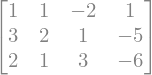

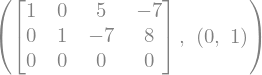

In [18]:
A = Matrix([[1, 1, -2, 1], [3, 2, 1, -5], [2, 1, 3, -6]])
display(A)
A.rref()

Resultatet er den reducerede række-echelonform og en liste over nummeret på de kolonner, der har en ledende indgang. Hvis man vil udelade denne liste, kan man i stedet skrive <code>.rref(pivots = False)</code>.

## Ligningssystemer med een løsning

Som det nok er gået op for de fleste, anviser lineær algebra en effektiv måde til at bestemme løsningerne til lineære ligningssystemer ved hjælpe af matrixregning. Vi kan f.eks. omskrive:

\begin{align*} 
    x_1 + 3 x_3 &= 20 \\ 4x_2 + 6 x_3 &= 74 \\ 3 x_1 + 6x_2 + 11 x_3 &= 136
\end{align*}

til:

\begin{equation*}
    \displaystyle \left[\begin{matrix}1 & 0 & 3\\0 & 4 & 6\\3 & 6 & 11\end{matrix}\right] \displaystyle \left[\begin{matrix}x_{1}\\x_{2}\\x_{3}\end{matrix}\right] = \displaystyle \left[\begin{matrix}20\\74\\136\end{matrix}\right]
\end{equation*}

Når vi har et ligningssystem på denne form, og der findes en entydig løsning, kan vi uden videre beregne løsningen med SymPy. Vi benytter blot <code>LUsolve</code>-metoden på en matrix, og giver den højre side af vores ligningssystem som inputparameter:

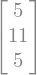

In [19]:
#Definerer her matrix A og vektor b
A = Matrix([[1, 0, 3], [0, 4, 6], [3, 6, 11]])
b = Matrix([20, 74, 136])

#Løsningen findes nu blot ved:
sol = A.LUsolve(b)
display(sol)

Skulle vi være mistroiske overfor moderne datamater, kan vi nu verificere at 

\begin{equation*}
    \displaystyle \left[\begin{matrix}x_{1}\\x_{2}\\x_{3}\end{matrix}\right] = \displaystyle \left[\begin{matrix}5 \\11\\5\end{matrix}\right]
\end{equation*}

virkelig er en løsning ved at multiplicere matricen $A$ med løsningsvektoren:

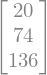

In [20]:
A * sol

Vi kan lave tilsvarende operationer med symbolske variable. Lad $A$ være matricen angivet ovenfor, men i stedet ønsker vi nu at finde en generel løsning til 

\begin{equation*}
    \displaystyle \left[\begin{matrix}1 & 0 & 3\\0 & 4 & 6\\3 & 6 & 11\end{matrix}\right] \displaystyle \left[\begin{matrix}x_{1}\\x_{2}\\x_{3}\end{matrix}\right] = \displaystyle \left[\begin{matrix}d\\e\\f\end{matrix}\right]
\end{equation*}

## Omvendte/inverse matricer
Som beskrevet i Messer afsnit 5.2 kan matricer inverteres. Dette gøres meget simpelt for en matrix $A$ med syntaksen <code>A.inv()</code>:

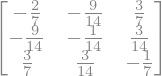

In [21]:
A.inv()

Såfremt den omvendte/inverse matrix for $A$ eksisterer, kan vi derfor også løse det ovenstående ligningssystem som

\begin{equation*}
    \displaystyle \left[\begin{matrix}x_{1}\\x_{2}\\x_{3}\end{matrix}\right] = 
    \displaystyle \left[\begin{matrix}1 & 0 & 3\\0 & 4 & 6\\3 & 6 & 11\end{matrix}\right]^{-1}
    \displaystyle \left[\begin{matrix}d\\e\\f\end{matrix}\right]
\end{equation*}

hvilket i Python-syntax gøres ved

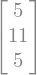

In [22]:
A.inv()*b

## Matrixrang 
Bemærk at hverken man hverken kan finde løsninger med <code>LUsolve</code> eller ved at beregne den inverse matrix hvis  ikke ligningssystemet har netop én løsning (dvs. hvis ligningerne i ligningssystemet har indbygget en modstrid eller løsningen har en eller flere frie variable). I disse tilfælde vil begge metoder give fejlmeddelelser.

Årsagen hertil er at koefficientmatricen ikke har fuld rang. Rangen for en matrix $A$ kan findes ved <code>A.rank()</code>, og angiver antallet af ledende et-taller i den matrix, der fremkommer ved at føre $A$ på reduceret række-echelonform.

Af denne grund, og i overensstemmelse med Messer sætning 5.12, er det derfor ingen overraskelse at se at $A$ fra overfor, der repræsenterer 3 lineært uafgængige ligninger med 3 ubekendte, har rang 3:

In [23]:
A.rank()

## Ligningssystemer med flere løsninger: frie parametre
Vi kommer dog ofte ud for ligningssystemer med flere ubekendte end der er lineært uafhængige ligninger, svarende til at løsningen kan parametriseres med et antal fri variable/parametre. Dette svarer til at rangen af den tilsvarende koefficientmatrix $A$ er mindre end antallet af variable i ligningssystemet.
I sådanne tilfælde er A ikke invertibel og <code>LU-solve</code> vil derfor ikke virke.

Eksempel: Vi vil gerne finde den fuldstændige løsning til 
\begin{equation*}
    \displaystyle \left[\begin{matrix}1 & 0 & 3 & 1\\0 & 4 & 6 & 1\\-1 & 4 & 3 & 0\end{matrix}\right] \displaystyle \left[\begin{matrix}x_{1}\\x_{2}\\x_{3}\end{matrix}\right] = \displaystyle \left[\begin{matrix}0\\0\\0\end{matrix}\right]
\end{equation*}

En mulighed er at føre $A$ på reduceret række-echelonform:

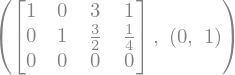

In [25]:
A = Matrix([[1, 0, 3, 1], [0, 4, 6, 1], [-1, 4, 3, 0]])
A.rref()

Vi sætter $x_3 = r$ og $x_4 = s$ da der ikke er ledende indgange i 3. og 4. kolonne. Herefter opskriver vi løsningen som
\begin{equation*}
    \displaystyle \left[\begin{matrix}x_{1}\\x_{2}\\x_{3}\\x_4\end{matrix}\right] = 
    \displaystyle \left[\begin{matrix}-3\\-\frac32\\1\\0\end{matrix}\right]\cdot r +
    \displaystyle \left[\begin{matrix}-1\\-\frac14\\0\\1\end{matrix}\right]\cdot s, \hspace{1cm}r,s\in {\rm I\!R}
\end{equation*}

Men vi kan også benytte metoden <code>.gauss_jordan_solve()</code> som efterligner denne metode, blot med en lidt anden typografi:

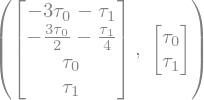

In [27]:
b = Matrix([0, 0, 0])
A.gauss_jordan_solve(b)